In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [137]:
import cv2
import os
from PIL import Image

In [125]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(10)

## A. mnist_c (mnist_corrupted)
- User only need to choose mnist or mnist_corrupted

In [170]:
directory_path = 'mnist_c'
train_data_x = []
train_data_y = []
test_data_x  = []
test_data_y  = []

for item in os.listdir(directory_path):
    # Create the full path of the item
    item_path = os.path.join(directory_path, item)
    
    # Check if the item is a directory
    if os.path.isdir(item_path):
        print(item)
        train_data_x.append(np.load('mnist_c/{}/train_images.npy'.format(item)))
        train_data_y.append(np.load('mnist_c/{}/train_labels.npy'.format(item)))

        test_data_x.append(np.load('mnist_c/{}/test_images.npy'.format(item)))
        test_data_y.append(np.load('mnist_c/{}/test_labels.npy'.format(item)))

train_np_x = np.concatenate(train_data_x)
train_np_y = np.concatenate(train_data_y)
test_np_x = np.concatenate(test_data_x)
test_np_y = np.concatenate(test_data_y)
        

brightness
canny_edges
dotted_line
fog
glass_blur
identity
impulse_noise
motion_blur
rotate
scale
shear
shot_noise
spatter
stripe
translate
zigzag


## A. Preprocess

In [150]:
print(train_np_x.shape, train_np_y.shape)

(28, 28, 1) (960000,)


(28, 28)


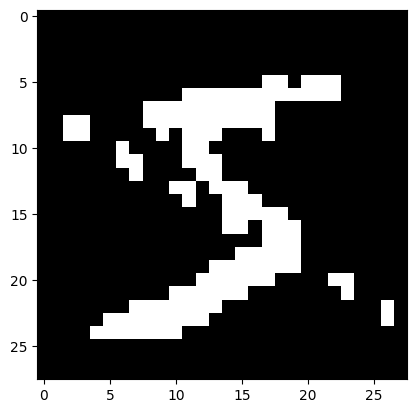

In [164]:
ret, img = cv2.threshold(train_np_x[120000],127,255,cv2.THRESH_BINARY)
print(img.shape)
plt.imshow(img, cmap="gray")

In [177]:
def grayscale_thresholded(grayscale_images):
    # Apply thresholding to each image in the array
   thresholded_images = np.zeros_like(grayscale_images)
    
   for i in range(grayscale_images.shape[0]):
       # Get a single grayscale image from the array
       grayscale_image = grayscale_images[i, :, :, 0]
       
       # Apply thresholding using cv.threshold()
       ret, thresholded_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)
       
       # Add a new axis to the thresholded image to make it compatible with the original shape
       thresholded_image = thresholded_image[:, :, np.newaxis]
       
       # Store the thresholded image in the output array
       thresholded_images[i, :, :, :] = thresholded_image
   return thresholded_images     

In [178]:
#ret, train_np_x_BIN = cv2.threshold(train_np_x,127,255,cv2.THRESH_BINARY)
#ret, test_np_x_BIN = cv2.threshold(test_np_x,127,255,cv2.THRESH_BINARY)

train_np_x_BIN = grayscale_thresholded(train_np_x)
test_np_x_BIN = grayscale_thresholded(test_np_x)

x_Train4D=train_np_x_BIN.astype('float32')
x_Test4D =test_np_x_BIN.astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize  = x_Test4D / 255

y_TrainOneHot = tf.keras.utils.to_categorical(train_np_y)
y_TestOneHot = tf.keras.utils.to_categorical(test_np_y)

print(x_Train4D_normalize.shape, x_Test4D_normalize.shape)
print(y_TrainOneHot.shape, y_TestOneHot.shape)

(960000, 28, 28, 1) (160000, 28, 28, 1)
(960000, 10) (160000, 10)


(28, 28)


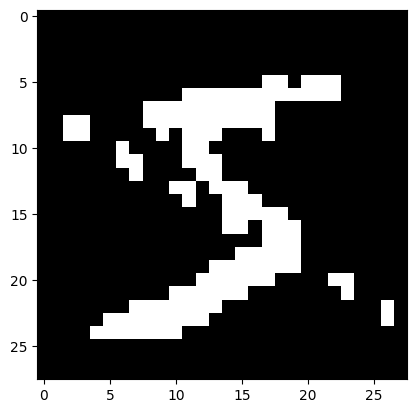

In [180]:
ret, img = cv2.threshold(train_np_x_BIN[120000],127,255,cv2.THRESH_BINARY)
print(img.shape)
plt.imshow(img, cmap="gray")

## B. mnist

In [42]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

## B. Preprocess

In [43]:
def binarize_grayimg(gray_img, threshold, len, binary_img):
  for l in range(len):
   for i in range(28):
    for j in range(28):
      if(gray_img[l,i,j]> threshold):
        binary_img[l,i,j] = 255
      else:
        binary_img[l,i,j] = 0

In [44]:
(x_Train).shape

(60000, 28, 28)

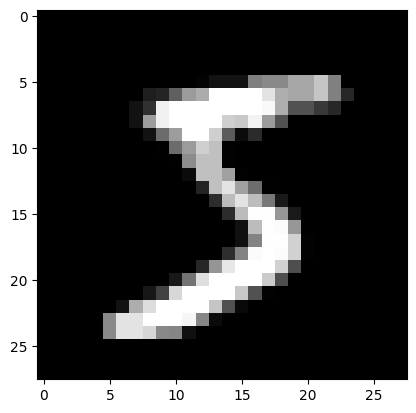

In [8]:
#kernel = np.ones((4,4),np.float32)/16
#dst = cv2.filter2D(x_Train[7],-1,kernel)
imageread = x_Train[0]
dst = cv2.medianBlur(imageread, 3)
plt.imshow(dst, cmap="gray")

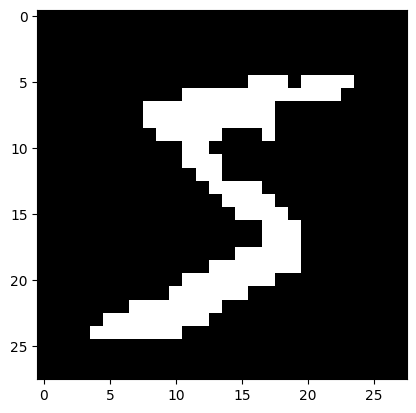

In [9]:
x_Train_b = np.zeros((len(x_Train), 28, 28), dtype=np.uint8)
dst_b = np.zeros((28, 28), dtype=np.uint8)

#binarize_grayimg(dst_b, 30, 1, x_Train_b[0])

dst = x_Train[0]
threshold = 100
for i in range(28):
  for j in range(28):
     if(dst[i,j]> threshold):
       dst_b[i,j] = 255
     else:
       dst_b[i,j] = 0

plt.imshow(dst_b, cmap="gray")

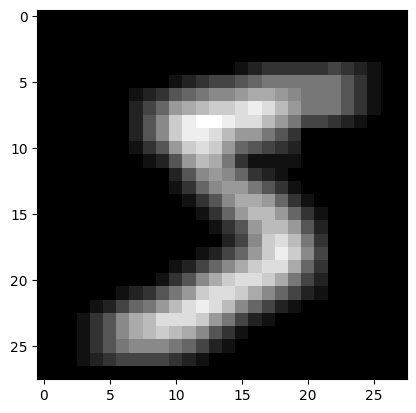

In [10]:
kernel = np.ones((4,4),np.float32)/16
dst_b = cv2.filter2D(dst_b,-1,kernel)
plt.imshow(dst_b, cmap="gray")

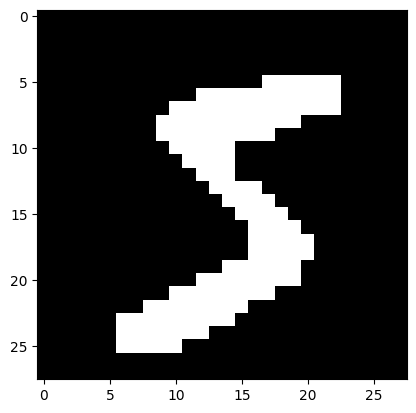

In [11]:
threshold = 100
for i in range(28):
  for j in range(28):
     if(dst_b[i,j]> threshold):
       dst_b[i,j] = 255
     else:
       dst_b[i,j] = 0

plt.imshow(dst_b, cmap="gray")

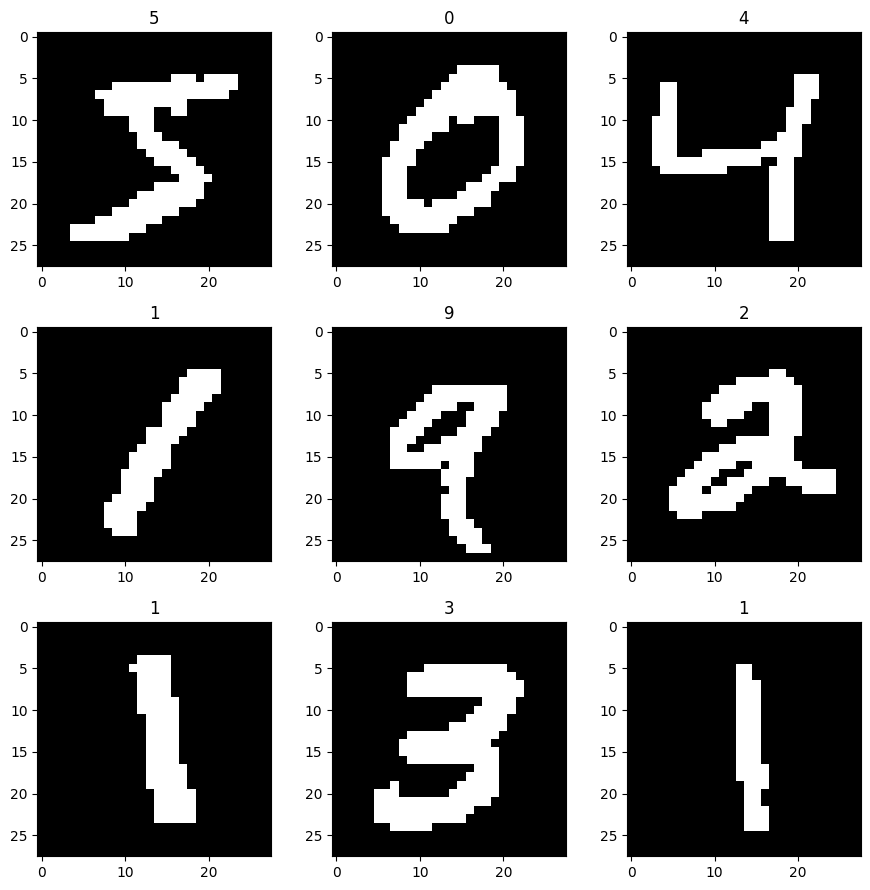

In [12]:
x_Train_b = np.zeros((100, 28, 28), dtype=np.uint8)
binarize_grayimg(x_Train, 30, 100, x_Train_b)

fig = plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  num = i#random.randint(0, len(x_Train))
  plt.imshow(x_Train_b[num], cmap="gray", interpolation=None)
  plt.title(y_Train[num])

plt.tight_layout()

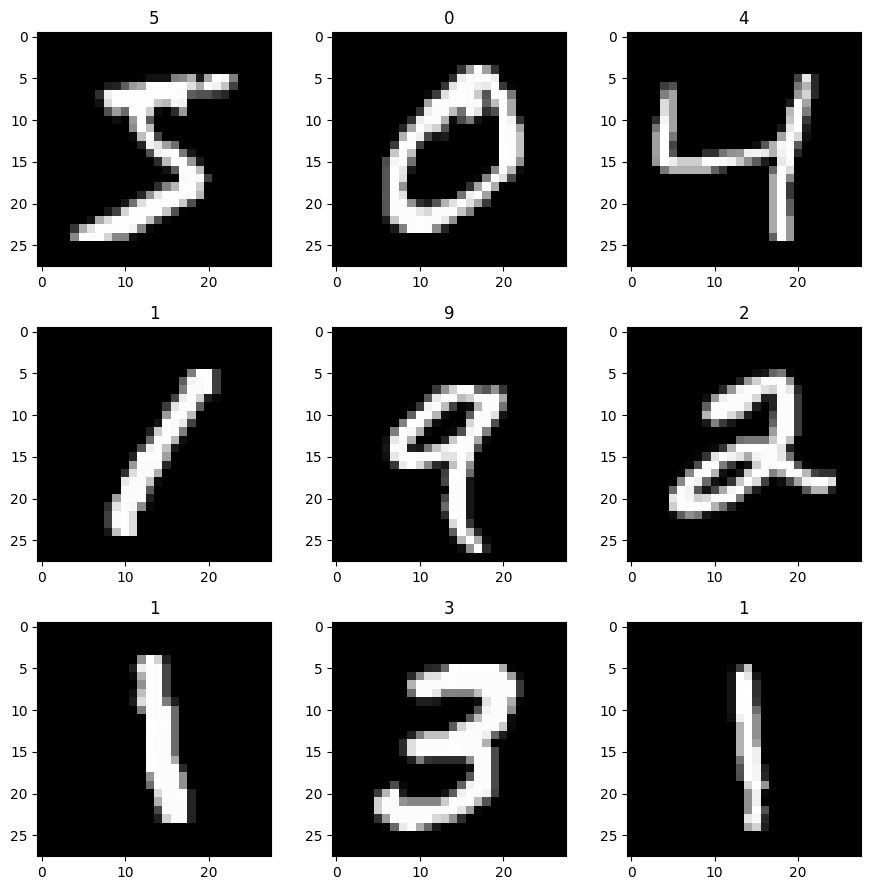

In [13]:
fig = plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  num = i#random.randint(0, len(x_Train))
  plt.imshow(x_Train[num], cmap="gray", interpolation=None)
  plt.title(y_Train[num])

plt.tight_layout()

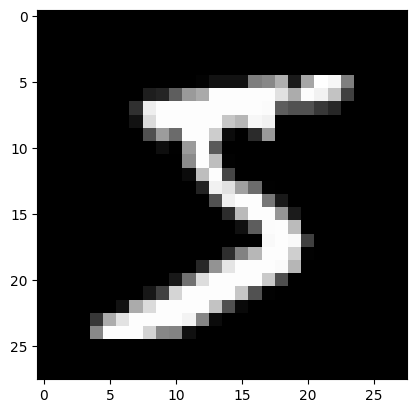

In [14]:
plt.imshow(x_Train[0], cmap="gray", interpolation=None)

In [45]:
x_Train_b = np.zeros((len(x_Train), 28, 28), dtype=np.uint8)
binarize_grayimg(x_Train, 30, len(x_Train), x_Train_b)

x_Test_b = np.zeros((len(x_Test), 28, 28), dtype=np.uint8)
binarize_grayimg(x_Test, 30, len(x_Test), x_Test_b)

x_Train4D=x_Train_b.reshape(x_Train_b.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test_b.reshape(x_Test_b.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [46]:
y_TrainOneHot = tf.keras.utils.to_categorical(y_Train)
y_TestOneHot = tf.keras.utils.to_categorical(y_Test)

In [49]:
(x_Train4D_normalize).shape
(x_Test4D_normalize).shape

(10000, 28, 28, 1)

## C. Standard Net Training
- fdmobilenet
- shufflenet

In [181]:
from tf2cv.model_provider import get_model as tf2cv_get_model
import tensorflow as tf

In [182]:
def _unwrap_tf2cv_fdmobilenet(tf2cv_model, dropout_rate):
            #tf2cv_model.trainable = False
            # Be careful, this is basing on the structure of fdmobilenet from tf2cv
            print("The total layers number: {}".format(len(tf2cv_model.layers)))
            base_model = tf2cv_model.layers[0]
            print("The total children layers number: {}".format(len(base_model.children)))
            
            # Change the AveragePooling2D to the GlobalAveragePooling2D for sutiable for all kernal size
            base_model.children[5] = tf.keras.layers.GlobalAveragePooling2D()
            
            inp = tf.keras.Input(shape=(28, 28, 1))
            x = inp
            #training = None
            x = base_model(x)
            if dropout_rate > 0:
                    x = tf.keras.layers.Dropout(dropout_rate, name="top_dropout")(x)
            x = tf.keras.layers.Dense(10, activation='softmax', use_bias=True, name='Logits')(x)

            return tf.keras.Model(inp, x)

def unwrap_tf2cv_shufflenet(tf2cv_model, dropout_rate):
            #tf2cv_model.trainable = False
            # Be careful, this is basing on the structure of shufflenet from tf2cv
            print("The total layers number: {}".format(len(tf2cv_model.layers)))
            base_model = tf2cv_model.layers[0]
            print("The total children layers number: {}".format(len(base_model.children)))
            print("The total children layers number of children 1: {}".format(len(base_model.children[1].children)))
            print("The total children layers number of children 2: {}".format(len(base_model.children[2].children)))
            print("The total children layers number of children 3: {}".format(len(base_model.children[3].children)))
            
            # Change the AveragePooling2D to the GlobalAveragePooling2D for sutiable for all kernal size
            base_model.children[4] = tf.keras.layers.GlobalAveragePooling2D()
            
            inp = tf.keras.Input(shape=(28, 28, 1))
            x = inp
            x = base_model(x)
            if dropout_rate > 0:
                    x = tf.keras.layers.Dropout(dropout_rate, name="top_dropout")(x)
            x = tf.keras.layers.Dense(10, activation='softmax', use_bias=True, name='Logits')(x)
            return tf.keras.Model(inp, x)

In [183]:
net = tf2cv_get_model("fdmobilenet_wd4", pretrained=False, data_format="channels_last")
custom_model = _unwrap_tf2cv_fdmobilenet(net, 0.2)

#net = tf2cv_get_model("shufflenet_g1_wd4", pretrained=False, data_format="channels_last")
#custom_model = unwrap_tf2cv_shufflenet(net, 0.2)

The total layers number: 2
The total children layers number: 6


In [184]:
custom_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.04), #RMSprop(learning_rate=0.04)
                #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                loss="categorical_crossentropy",
                metrics=['accuracy'])          
custom_model.summary()
callbacks_reducelr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_delta=0.005, mode='max', cooldown=3)


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 features (SimpleSequential)  (None, 256)              129952    
                                                                 
 top_dropout (Dropout)       (None, 256)               0         
                                                                 
 Logits (Dense)              (None, 10)                2570      
                                                                 
Total params: 132,522
Trainable params: 128,586
Non-trainable params: 3,936
_________________________________________________________________


In [185]:
history = custom_model.fit(x=x_Train4D_normalize,y=y_TrainOneHot, verbose=1,
                                          epochs=70, validation_split=0.1,
                                          callbacks=[callbacks_reducelr],
                                          batch_size=200)

Epoch 1/70
4320/4320 [==============================] - 28s 6ms/step - loss: 0.4972 - accuracy: 0.8430 - val_loss: 0.5160 - val_accuracy: 0.8372 - lr: 0.0400
Epoch 2/70
4320/4320 [==============================] - 28s 7ms/step - loss: 0.3083 - accuracy: 0.9035 - val_loss: 0.4508 - val_accuracy: 0.8642 - lr: 0.0400
Epoch 3/70
4320/4320 [==============================] - 26s 6ms/step - loss: 0.2669 - accuracy: 0.9158 - val_loss: 0.3750 - val_accuracy: 0.8820 - lr: 0.0400
Epoch 4/70
4320/4320 [==============================] - 26s 6ms/step - loss: 0.2443 - accuracy: 0.9224 - val_loss: 0.3165 - val_accuracy: 0.9028 - lr: 0.0400
Epoch 5/70
4320/4320 [==============================] - 25s 6ms/step - loss: 0.2302 - accuracy: 0.9265 - val_loss: 0.3238 - val_accuracy: 0.9029 - lr: 0.0400
Epoch 6/70
4320/4320 [==============================] - 25s 6ms/step - loss: 0.2224 - accuracy: 0.9287 - val_loss: 0.2839 - val_accuracy: 0.9131 - lr: 0.0400
Epoch 7/70
4320/4320 [==============================

In [186]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

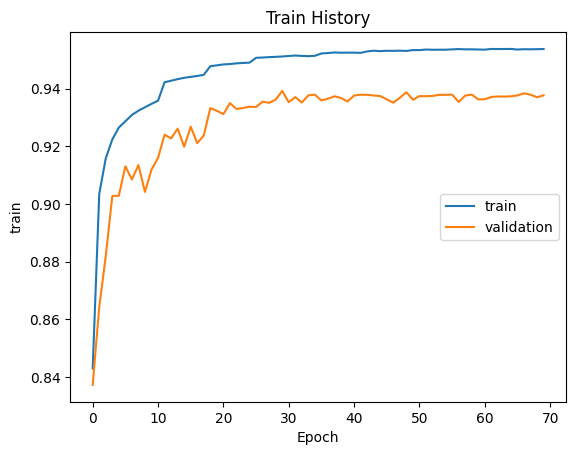

In [187]:
show_train_history(history, 'accuracy', 'val_accuracy')

In [188]:
scores = custom_model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

5000/5000 [==============================] - 14s 3ms/step - loss: 0.1636 - accuracy: 0.9464


0.9463812708854675

## C. Save to tflite

In [189]:
def representative_dataset():
 #    for _ in range(100):
 #     data = np.random.rand(1, 244, 244, 3)
 #     yield [data.astype(np.float32)]
  for data in tf.data.Dataset.from_tensor_slices((x_Test4D_normalize)).batch(1).take(200):
   yield [tf.dtypes.cast(data, tf.float32)]


# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(custom_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

# Save the model.
with open('./MNIST_fdmobilenet_wd4.tflite', 'wb') as f:
#with open('./MNIST_shufflenet_g1_wd4.tflite', 'wb') as f:
  f.write(tflite_quant_model)      

C:\ProgramData\miniforge3\envs\NuEdgeWise_env\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
